In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Library

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy.fft import fft


In [3]:
a = np.arange(5)

In [4]:
a

array([0, 1, 2, 3, 4])

In [5]:
arr = np.arange(0,11 , 2)

In [6]:
arr

array([ 0,  2,  4,  6,  8, 10])

In [7]:
data = loadmat('/content/drive/MyDrive/Ali/EEG_P2090.mat')

In [8]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Jun 25 17:42:00 2023',
 '__version__': '1.0',
 '__globals__': [],
 'EEG_P2090_processed': array([[ 0.08099003,  0.38671721,  0.85455762, ...,  0.20612061,
          0.1243387 ,  0.07913327],
        [ 0.06588963,  0.42519367,  0.91695394, ...,  0.25171279,
          0.33942146,  0.45061869],
        [ 0.14993292,  0.58781633,  1.04748039, ..., -0.07837302,
          0.25798247,  0.1771873 ],
        ...,
        [-0.52378222, -0.62752993, -0.66040078, ..., -0.49474289,
         -0.54995814, -0.58349074],
        [-0.58428771, -0.83443523, -0.97892268, ..., -0.33422464,
         -0.30624082, -0.30239014],
        [-0.25038106, -0.30457022, -0.38009657, ...,  0.04978373,
         -0.10943916, -0.1790117 ]])}

In [9]:
EEG = data['EEG_P2090_processed']

In [62]:
EEG

array([[ 0.08099003,  0.38671721,  0.85455762, ...,  0.20612061,
         0.1243387 ,  0.07913327],
       [ 0.06588963,  0.42519367,  0.91695394, ...,  0.25171279,
         0.33942146,  0.45061869],
       [ 0.14993292,  0.58781633,  1.04748039, ..., -0.07837302,
         0.25798247,  0.1771873 ],
       ...,
       [-0.52378222, -0.62752993, -0.66040078, ..., -0.49474289,
        -0.54995814, -0.58349074],
       [-0.58428771, -0.83443523, -0.97892268, ..., -0.33422464,
        -0.30624082, -0.30239014],
       [-0.25038106, -0.30457022, -0.38009657, ...,  0.04978373,
        -0.10943916, -0.1790117 ]])

In [10]:
EEG

array([[ 0.08099003,  0.38671721,  0.85455762, ...,  0.20612061,
         0.1243387 ,  0.07913327],
       [ 0.06588963,  0.42519367,  0.91695394, ...,  0.25171279,
         0.33942146,  0.45061869],
       [ 0.14993292,  0.58781633,  1.04748039, ..., -0.07837302,
         0.25798247,  0.1771873 ],
       ...,
       [-0.52378222, -0.62752993, -0.66040078, ..., -0.49474289,
        -0.54995814, -0.58349074],
       [-0.58428771, -0.83443523, -0.97892268, ..., -0.33422464,
        -0.30624082, -0.30239014],
       [-0.25038106, -0.30457022, -0.38009657, ...,  0.04978373,
        -0.10943916, -0.1790117 ]])

In [11]:
EEG.shape

(29, 150310)

In [12]:
# print the information of signals
num_channel  = EEG.shape[0]
num_samples = EEG.shape [1]
print(f'Number of Channels is {num_channel}.')
print(f' Number of samples {num_samples}')

Number of Channels is 29.
 Number of samples 150310


In [13]:
print("Number of channels" , num_channel)

Number of channels 29


In [14]:
Fs = 500

In [15]:
time_duration  = num_samples / Fs

print(f'the time duration of each signal is {time_duration}')
print(f'the time duration of each signal is {time_duration/60}')


the time duration of each signal is 300.62
the time duration of each signal is 5.0103333333333335


# Visualization

In [16]:
ch_toplot  = 2
time = range(EEG.shape[1])

In [17]:
time

range(0, 150310)

Text(0, 0.5, 'Amplitude')

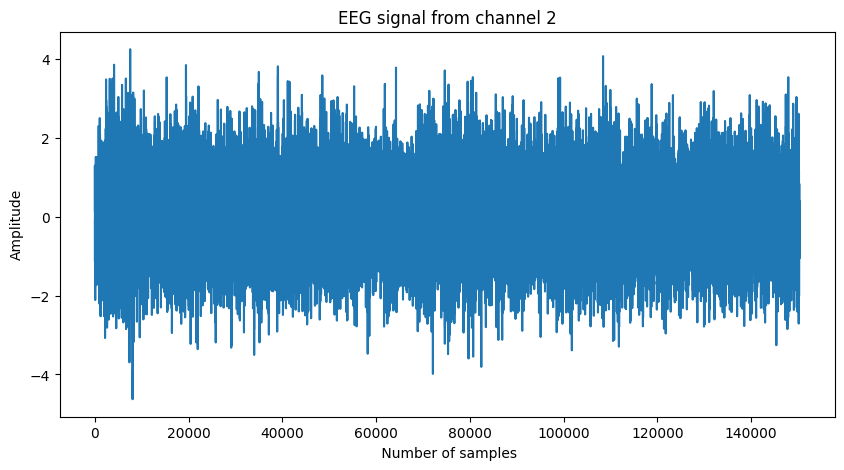

In [18]:
plt.figure(figsize = (10, 5))
plt.plot(time, EEG[ch_toplot])
plt.title(f'EEG signal from channel {ch_toplot}')
plt.xlabel(" Number of samples")
plt.ylabel("Amplitude")

In [19]:
num_channels  = EEG.shape[0]


In [20]:
num_channels

29

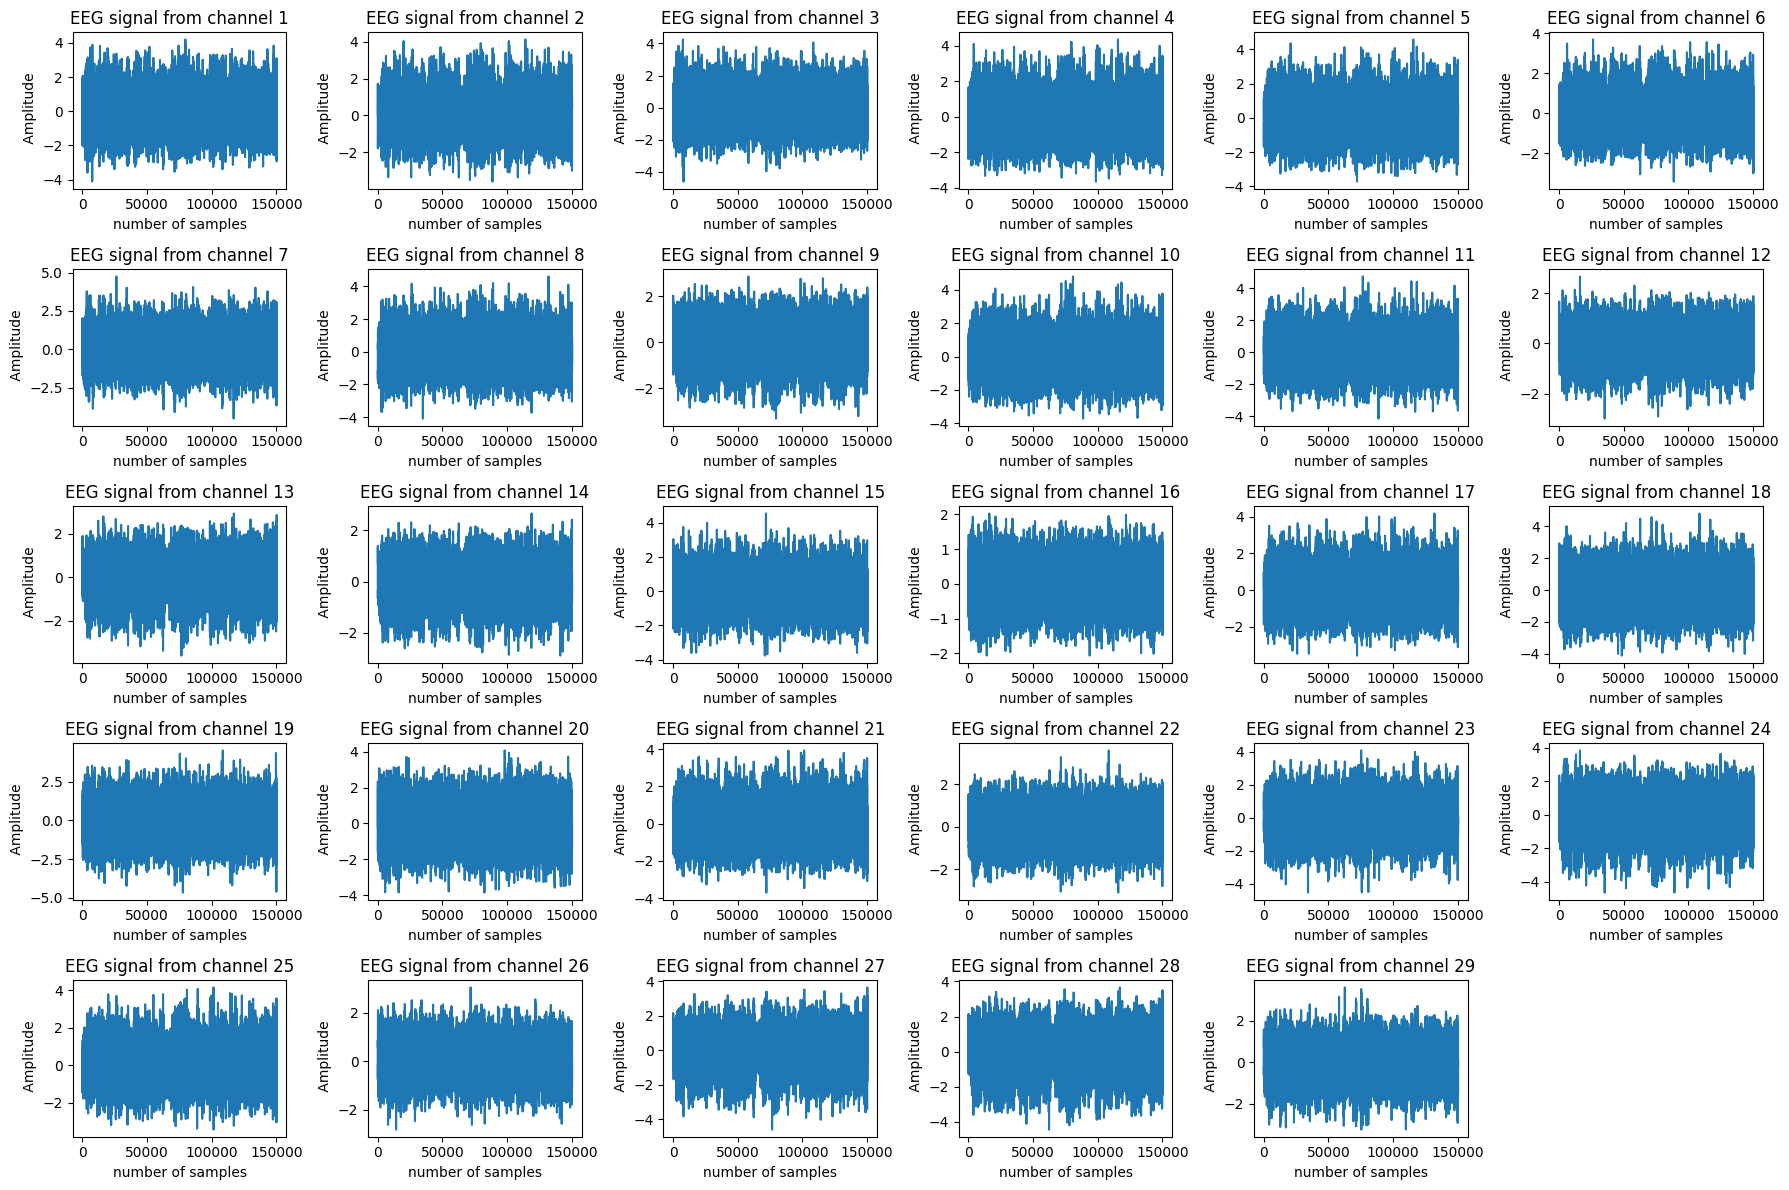

In [21]:
num_channels  = EEG.shape[0]
num_rows = 5
num_cols = 6
plt.figure(figsize=(18 , 12))

for channel in range(num_channels):

  ch_toplot = channel
  plt.subplot(num_rows, num_cols, channel +1)
  plt.plot(EEG[ch_toplot])
  plt.title(f'EEG signal from channel {ch_toplot+1}')
  plt.xlabel('number of samples')
  plt.ylabel(' Amplitude')


plt.tight_layout()
plt.show()




In [22]:
start_time = 0
stop_time = 5

FS = 500

start_sample = int(start_time * FS)

stop_sample = int(stop_time * FS)


In [23]:
len(EEG[0][0:2500])

2500

In [24]:
stop_sample

2500

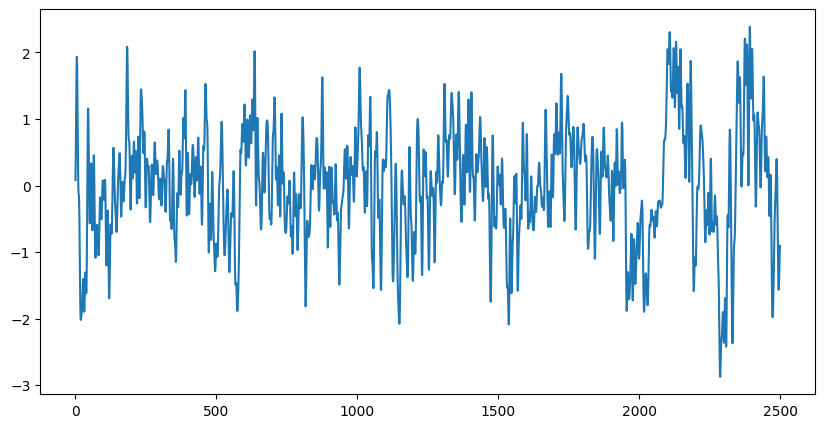

In [25]:
plt.figure(figsize = (10, 5))
plt.plot(EEG[0][start_sample:stop_sample])

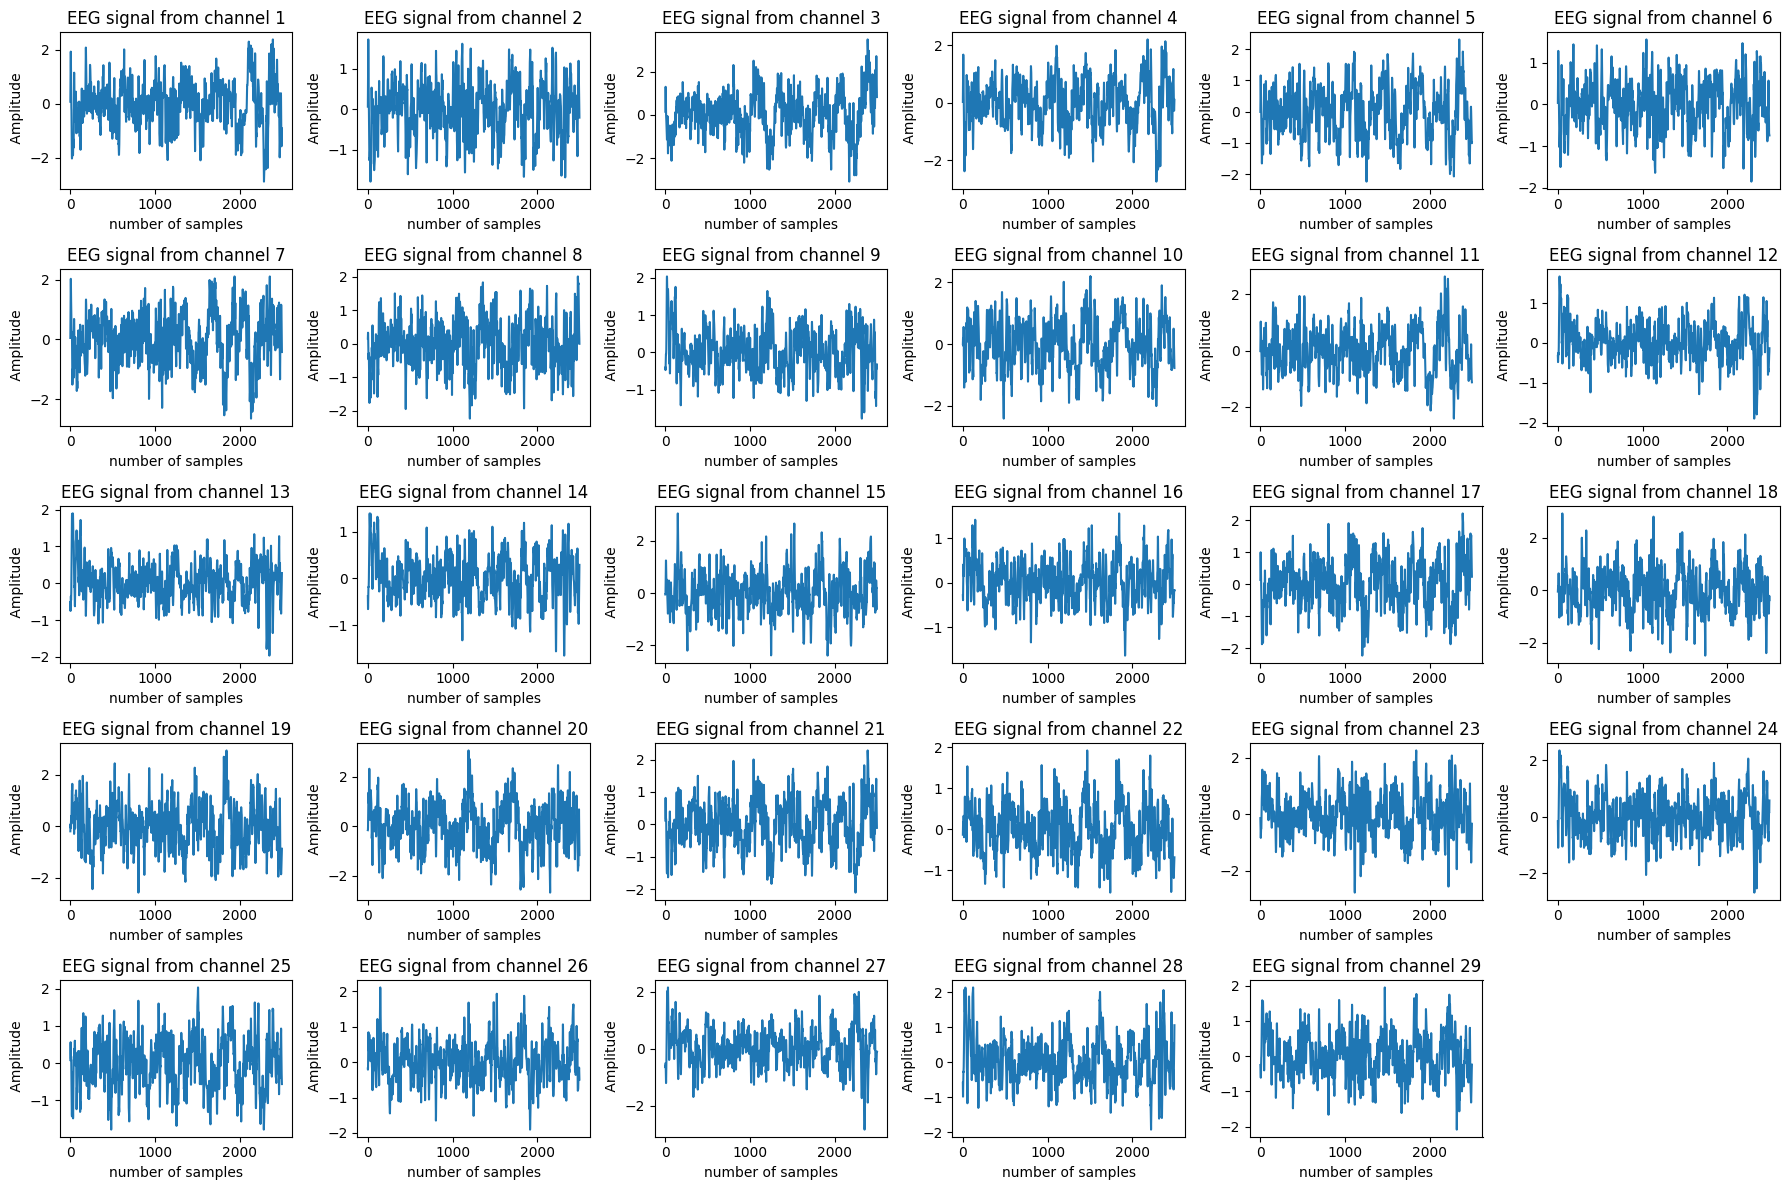

In [26]:
num_channels  = EEG.shape[0]
num_rows = 5
num_cols = 6
plt.figure(figsize=(18 , 12))

for channel in range(num_channels):

  ch_toplot = channel
  plt.subplot(num_rows, num_cols, channel +1)
  plt.plot(EEG[ch_toplot][0:2500])
  plt.title(f'EEG signal from channel {ch_toplot+1}')
  plt.xlabel('number of samples')
  plt.ylabel(' Amplitude')


plt.tight_layout()
plt.show()




In [27]:
Vertical_space = 4

Duration = 5

fs = 500


num_samples = 5 * 500

EEG_signal = EEG[ : , : num_samples ]

time_axis = np.arange(num_samples)/fs

In [28]:
time_axis

array([0.000e+00, 2.000e-03, 4.000e-03, ..., 4.994e+00, 4.996e+00,
       4.998e+00])

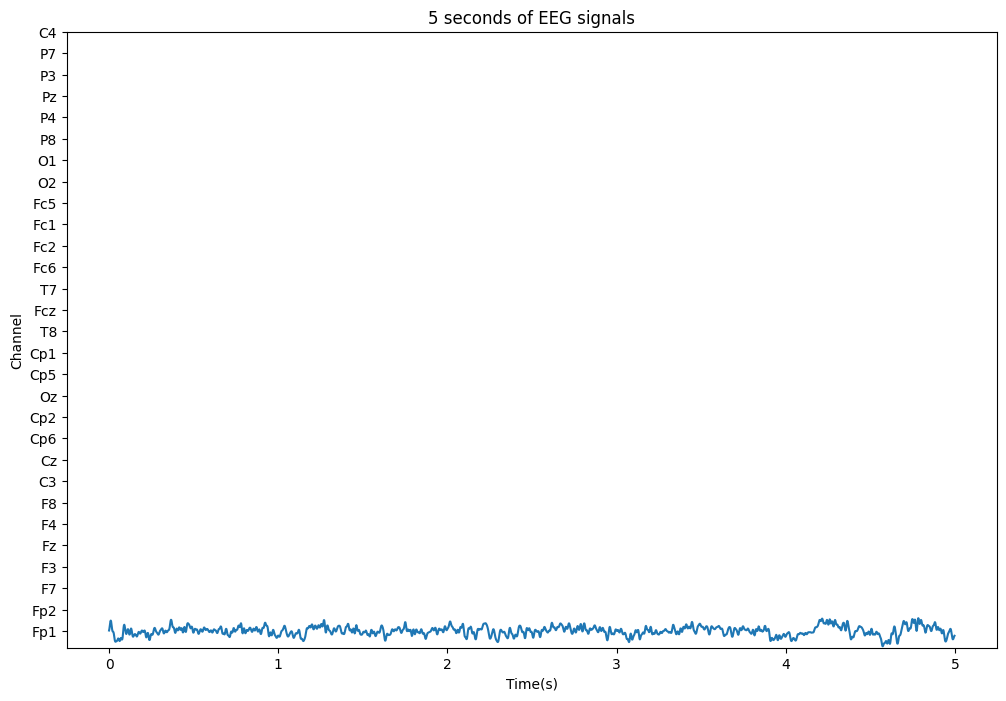

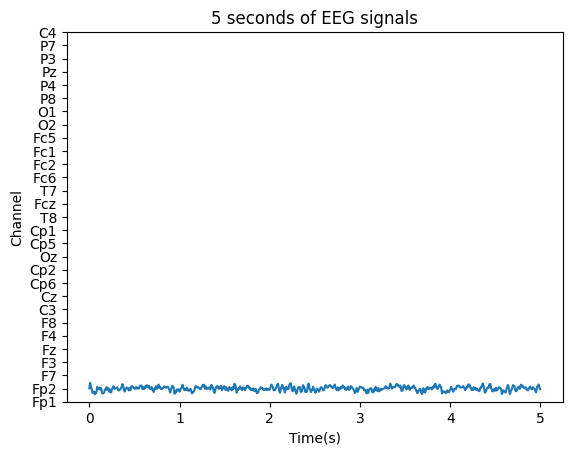

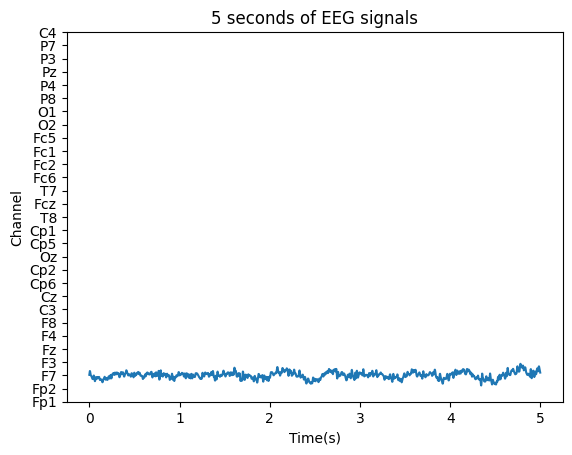

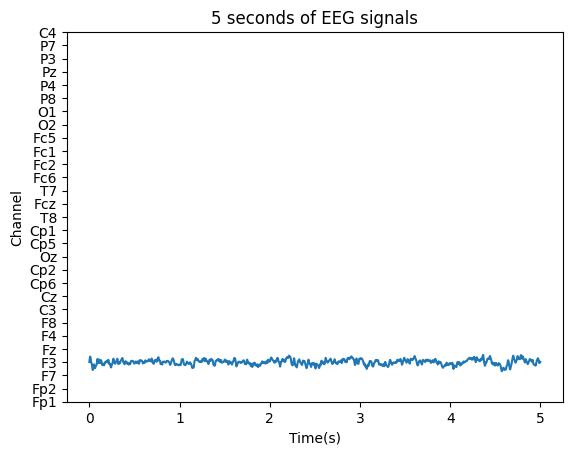

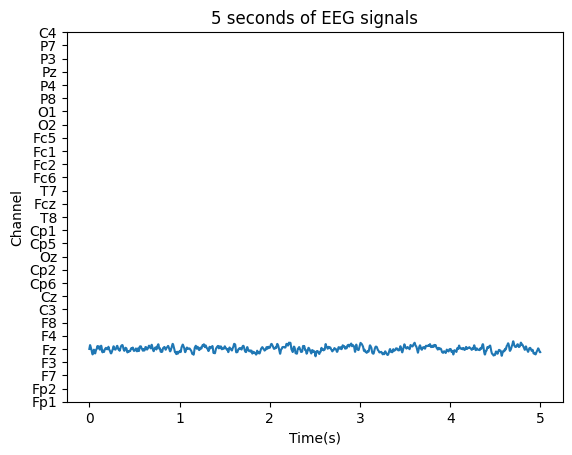

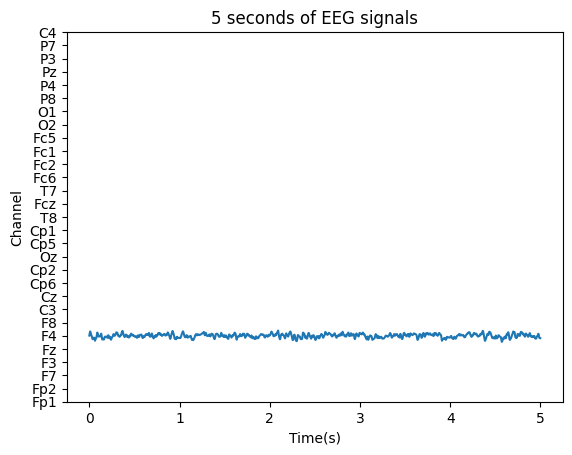

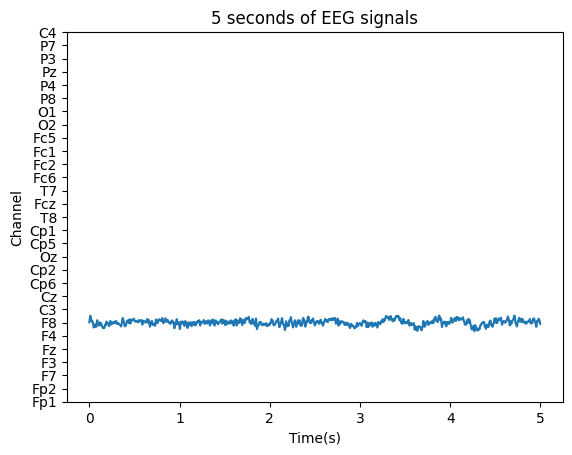

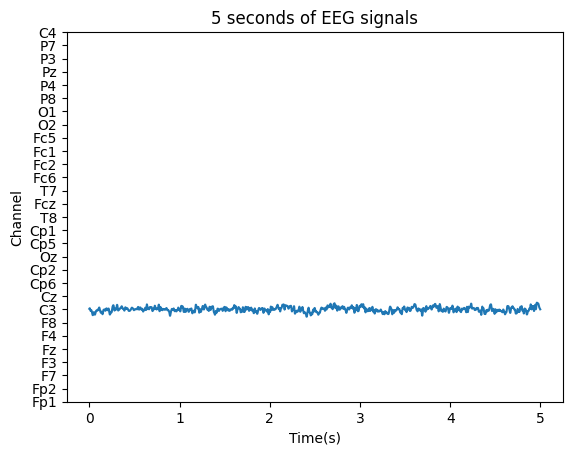

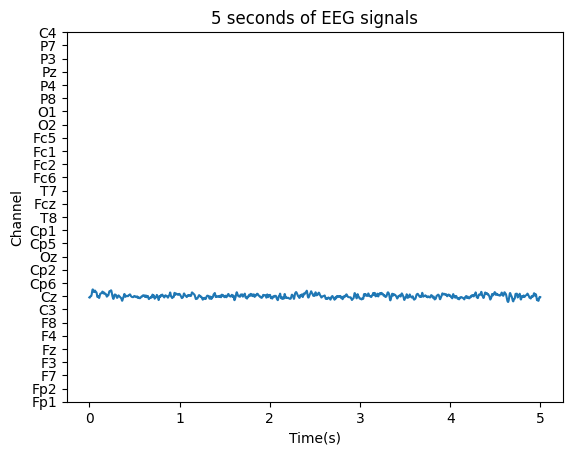

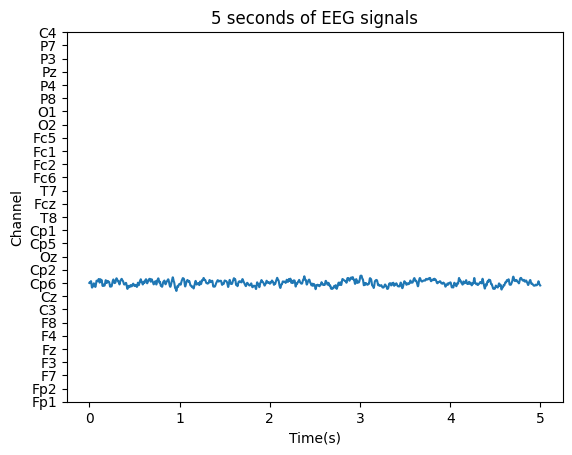

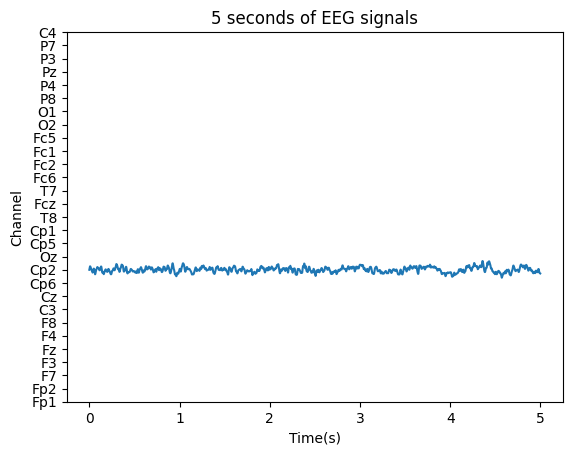

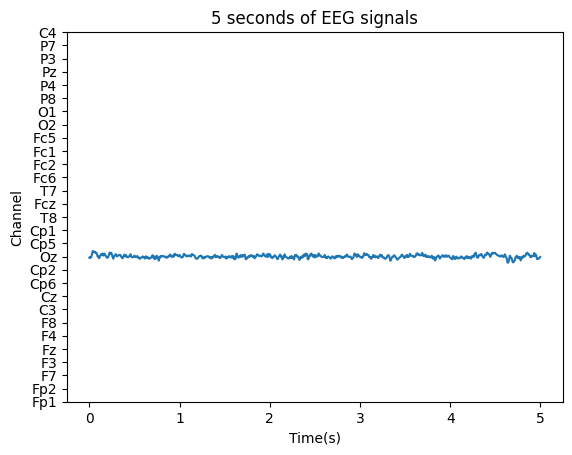

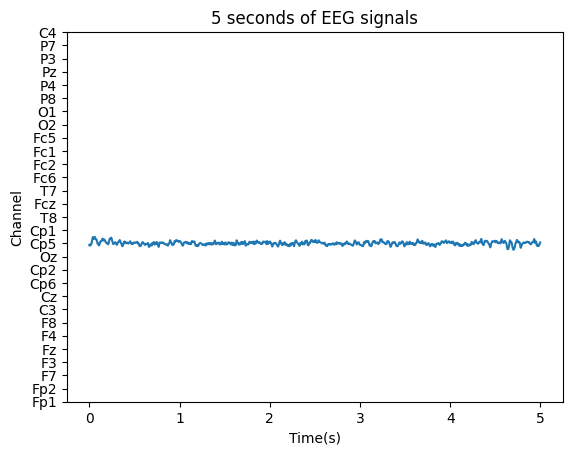

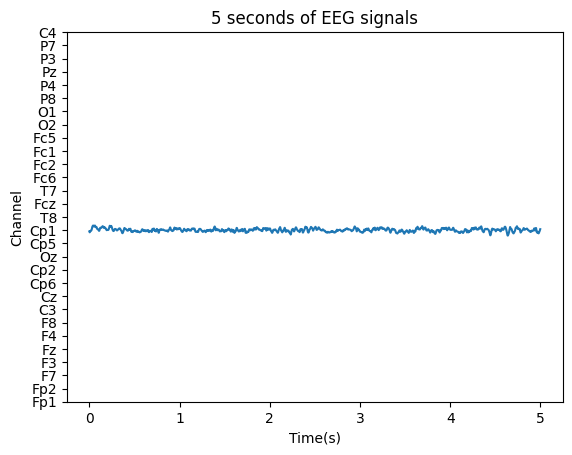

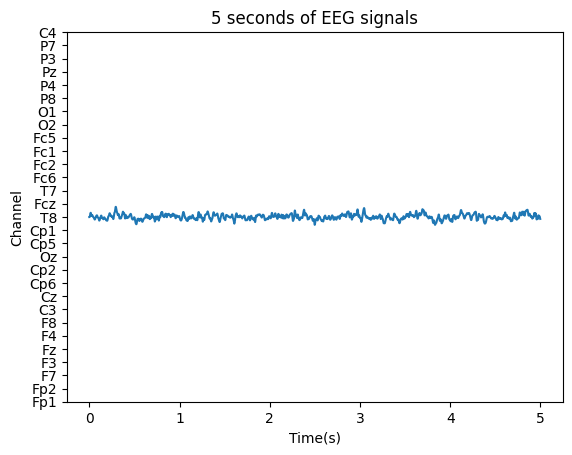

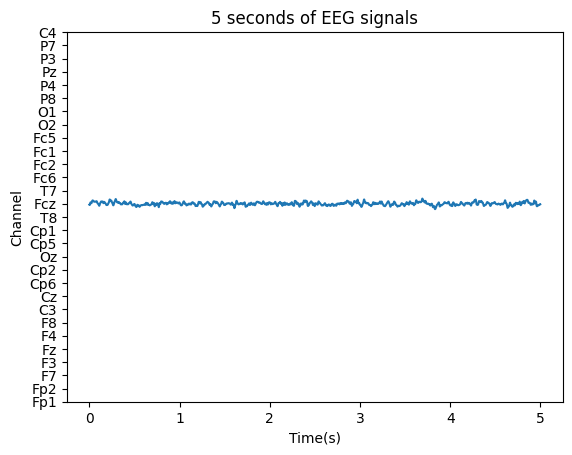

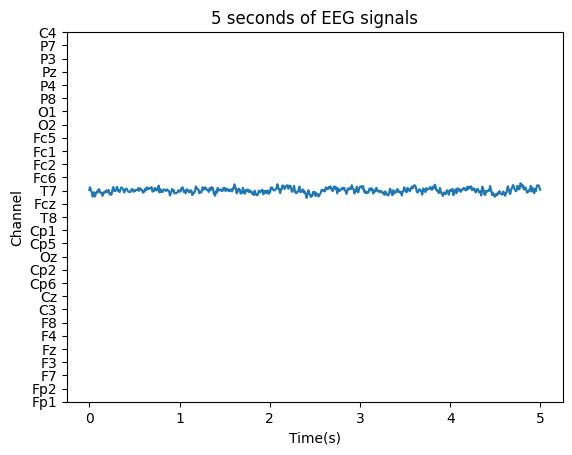

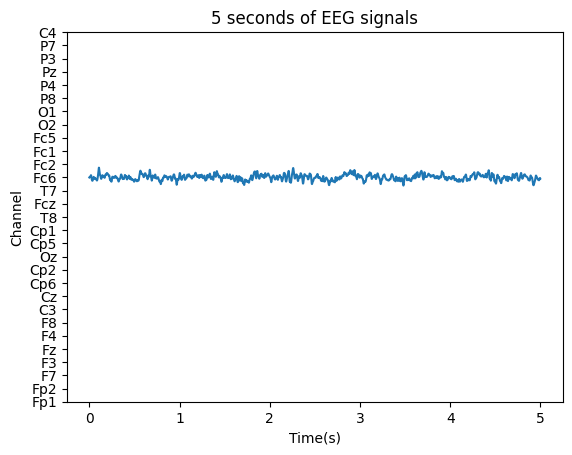

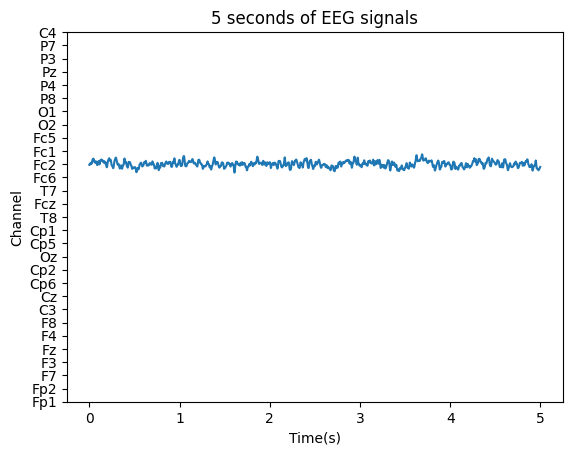

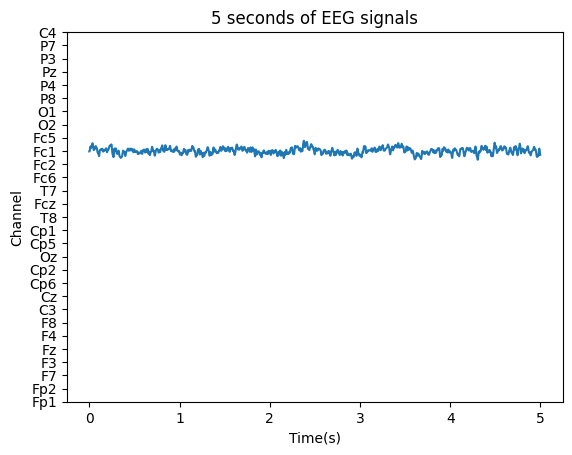

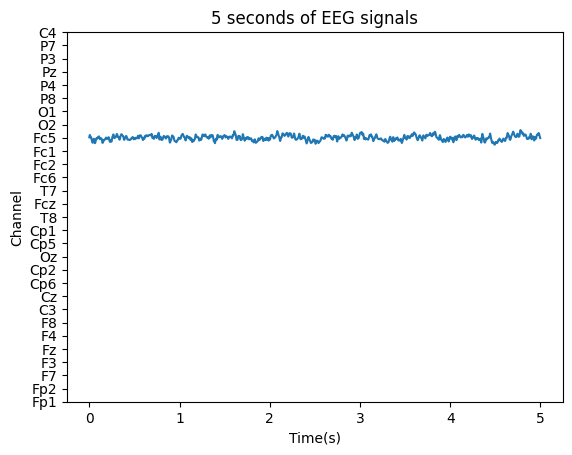

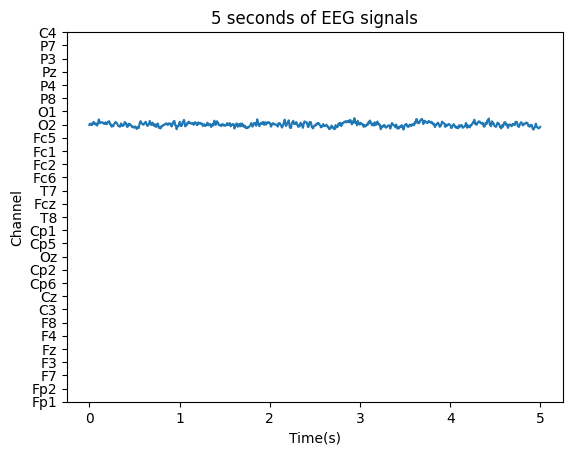

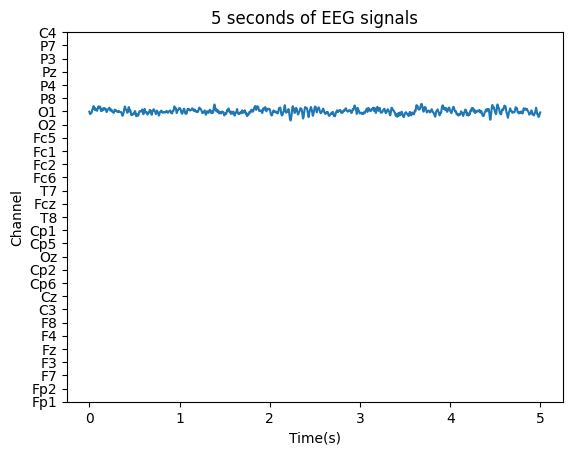

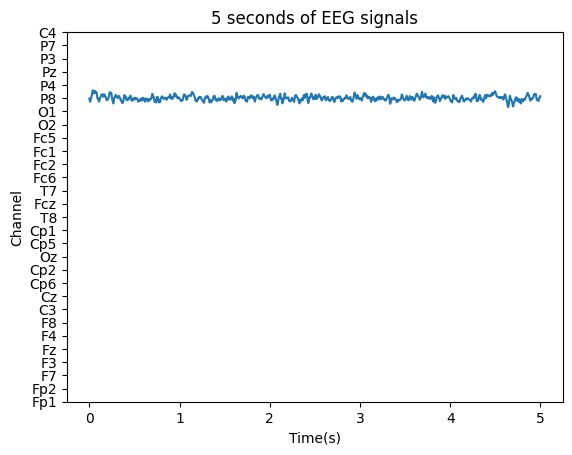

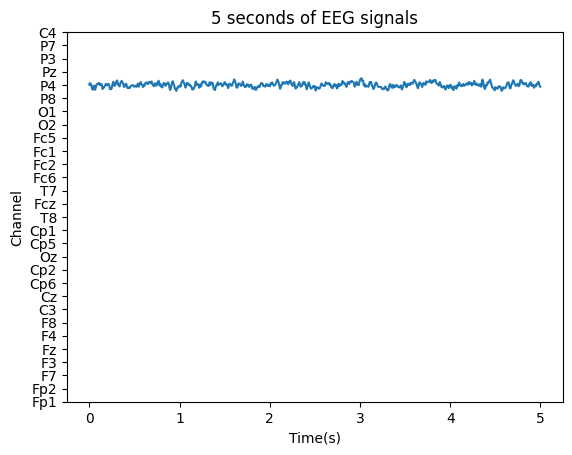

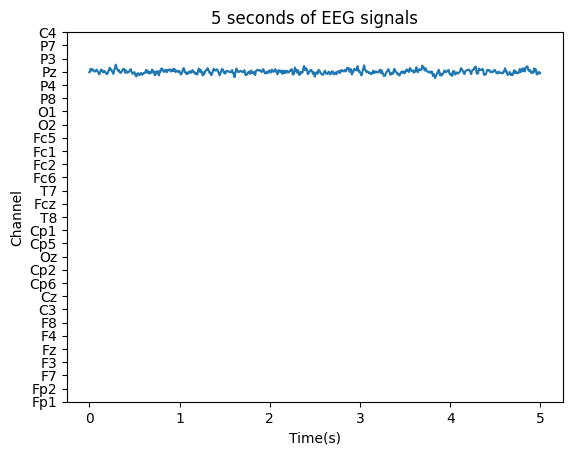

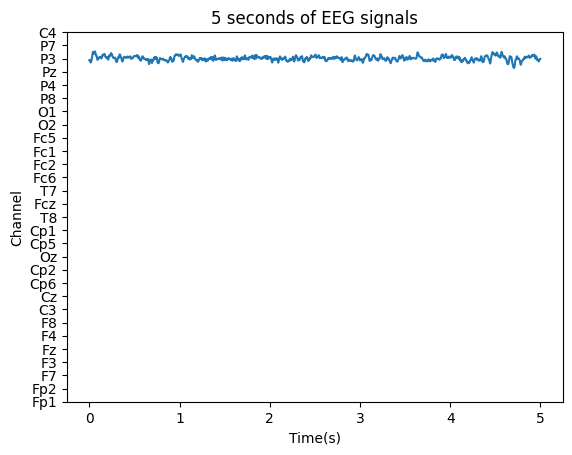

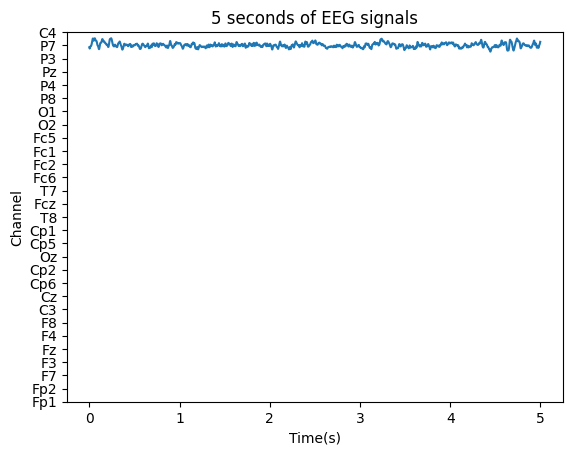

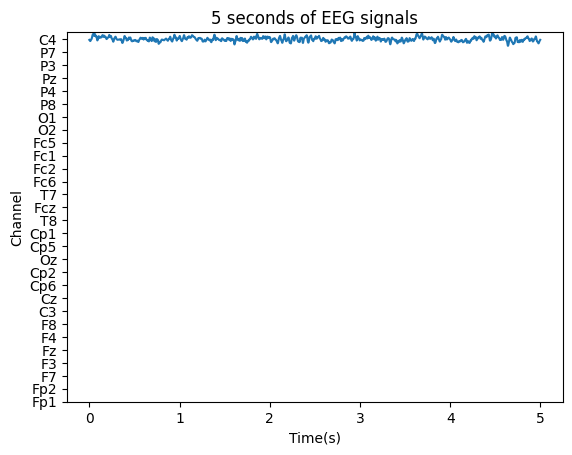

In [29]:
plt.figure(figsize=(12 , 8))


for channel in range(EEG.shape[0]):
  channel_signal = EEG_signal[channel] + channel * Vertical_space
  plt.plot(time_axis, channel_signal)
  channel_labels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'C3', 'Cz', 'Cp6', 'Cp2', 'Oz','Cp5', 'Cp1', 'T8', 'Fcz', 'T7', 'Fc6', 'Fc2', 'Fc1', 'Fc5', 'O2', 'O1','P8', 'P4', 'Pz', 'P3', 'P7', 'C4']
  channel_positions = np.arange(EEG_signal.shape[0]) * Vertical_space
  plt.yticks(channel_positions, channel_labels)
  plt.xlabel('Time(s)')
  plt.ylabel('Channel')
  plt.title('5 seconds of EEG signals')
  plt.show()

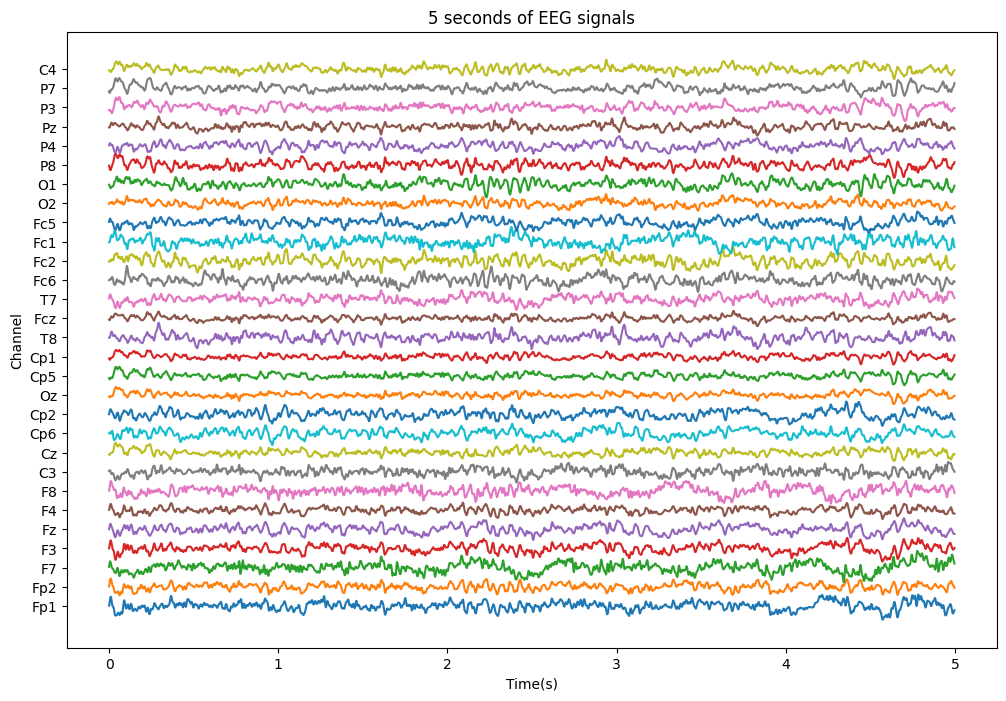

In [30]:
plt.figure(figsize=(12 , 8))


for channel in range(EEG.shape[0]):
  channel_signal = EEG_signal[channel] + channel * Vertical_space
  plt.plot(time_axis, channel_signal)
  channel_labels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'C3', 'Cz', 'Cp6', 'Cp2', 'Oz','Cp5', 'Cp1', 'T8', 'Fcz', 'T7', 'Fc6', 'Fc2', 'Fc1', 'Fc5', 'O2', 'O1','P8', 'P4', 'Pz', 'P3', 'P7', 'C4']
  channel_positions = np.arange(EEG_signal.shape[0]) * Vertical_space
  plt.yticks(channel_positions, channel_labels)
  plt.xlabel('Time(s)')
  plt.ylabel('Channel')
  plt.title('5 seconds of EEG signals')
plt.show()

# Task 1

Use subplot in order to plot 3 range of the signals,  30-40 ,  150-160 , last 5 seconds

In [31]:


a = EEG[0][0:1500]



b = EEG[27][3000:4500]

In [32]:
len(a)

1500

In [33]:
len(b)

1500

In [34]:
mean_a = np.mean(a)

In [35]:
mean_a

0.0015204511676547435

In [36]:
def Calculate_stats(data):
  mean = np.mean(data)
  variance = np.var(data)
  std_devi = np.std(data)
  return mean , variance, std_devi

In [37]:
mean_a, var_a, std_a = Calculate_stats(a)

In [38]:
mean_b = Calculate_stats(b)

In [39]:
mean_a

0.0015204511676547435

In [40]:
var_a

0.522353380094675

In [41]:
std_a

0.7227401885149843

# Spectrum

In [63]:
a = EEG[0][0:2500]

In [67]:
a.shape
fs = 500
t = np.arange(0, len(a))/fs

In [69]:
dt = t[1] - t[0]

In [71]:
dt

0.002

In [72]:
N = len(a)
T = N * dt

In [73]:
T

5.0

In [79]:
xf = fft(a - np.mean(a))

In [82]:
xf

array([-2.97539771e-14 +0.j        , -6.33940048e+00 -8.06617169j,
       -2.72456519e+01-24.3034994j , ..., -2.93986704e+01-39.88729637j,
       -2.72456519e+01+24.3034994j , -6.33940048e+00 +8.06617169j])

In [81]:
xfj = xf.conj()

In [83]:
xfj

array([-2.97539771e-14 -0.j        , -6.33940048e+00 +8.06617169j,
       -2.72456519e+01+24.3034994j , ..., -2.93986704e+01+39.88729637j,
       -2.72456519e+01-24.3034994j , -6.33940048e+00 -8.06617169j])

In [84]:
Sxx=  2 * dt **2 / T *(xf * xfj)

In [85]:
Sxx

array([1.41647864e-33+0.j, 1.68401799e-04+0.j, 2.13277701e-03+0.j, ...,
       3.92844517e-03+0.j, 2.13277701e-03+0.j, 1.68401799e-04+0.j])

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


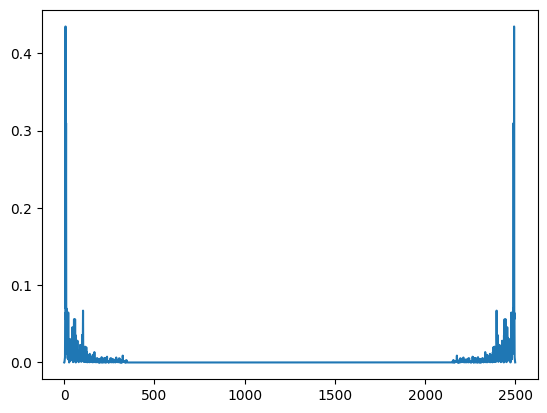

In [86]:
plt.plot(Sxx)

# Task 1

Explain why is above plot is symmetrical?

In [87]:
Sxx = Sxx [: int(N/2)]

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


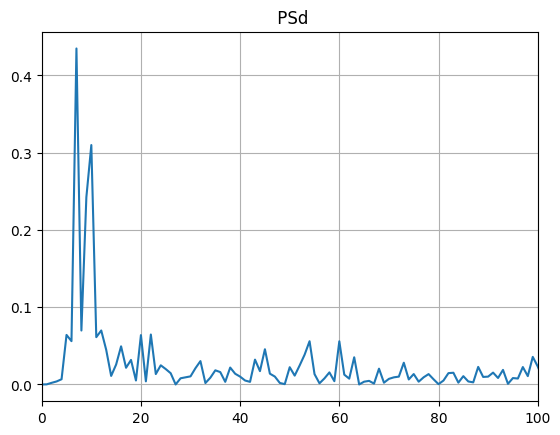

In [90]:
plt.plot(Sxx)
plt.title(" PSd")
plt.xlim([0,100])
plt.grid(True)

#  task 2

plot the autocovariance for a and b

# Time_freq

In [92]:
from scipy.signal import spectrogram

In [93]:
nfft = 500
overlap = 2
fs = 500
freqs , times, Sxx = spectrogram(a, fs=fs, nperseg=nfft, noverlap= overlap)

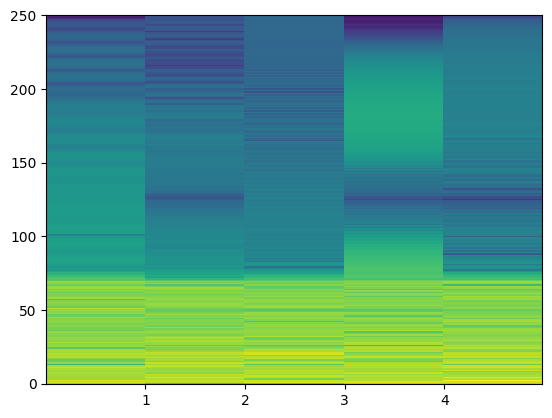

In [94]:
plt.pcolormesh(times, freqs, 10*np.log10(Sxx))

#Task3
 change the value of the nfft from 500 to 250,20. and plot the spectrograms of each of them
